# Homework 1: Ehsaan Mohammed, emohammed@ucdavis.edu

In this assignment, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.

#### Other Notes
 - Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of **this** assignment. <br >
 - If not specified, you are not required to do hyperparameter tuning, but feel free to do so if you'd like.
 - Discussion materials should be helpful for doing the assignments.

# Exercises
## Exercise 1 - Exploratory Analysis (20 points in total)

### Exercise 1.1 - Correlation Matrix (10 points)
Generate a Pearson [correlation matrix plot](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07) in the form of a heatmap. See the link to have an idea about what this visualization should look like. <br >
After generating the plot, answer the following question: <br >
**If we are going to predict ``mpg`` in Simple Linear Regression(i.e., $y=ax+b$), which attribute are you most UNLIKELY to pick as the independent variable? Explain why.**

Requirements & notes
 - When computing correlation, make sure to drop the column ``origin`` to avoid errors.
 - The computed correlation values should be shown on the plot.
 - Use a diverging color scale with the color range being \[-1, 1\] and center being 0 (if applicable).

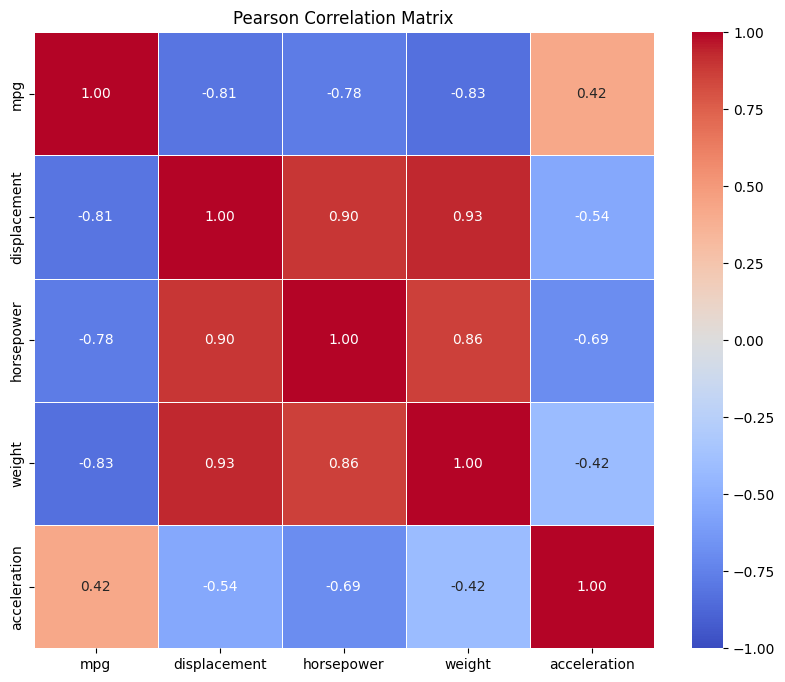

In [ ]:
'''
In statistics, the Pearson correlation coefficient (PCC)[a] is a
correlation coefficient that measures linear correlation between two sets of data.
it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1

source: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
'''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('auto-mpg.csv')  # load the dataset
df = df.drop(columns=['origin'])  # drop irrelevant column

correlation_matrix = df.corr(method='pearson')  # calculate correlations

plt.figure(figsize=(10, 8))  # setup plot size
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    center=0,
    linewidths=0.5
)
plt.title("Pearson Correlation Matrix")  # add plot title
plt.show()  # show the heatmap

In simple linear regression, we aim to pick an independent variable $x$ that has a strong linear relationship with the dependent variable $y$, which in this case is mpg.

I'm most unlikely to pick acceleration as the independent variable because its linear relationship with mpg is too weak to create a meaningful prediction.

### Exercise 1.2 - Pairplot (10 points)
Generate a pairplot(a.k.a. scatter plot matrix) of the given dataset. <br >
After generating the plot, answer the following question: <br >
**If we are using ``horsepower`` to predict ``mpg``, which method could lead to the best performance? (Linear Regression, Polynomial Regression, or Logistic Regression) Explain why.**

Note that there is no requirement on the diagonals. You can leave empty or use other representations based on your preference. However, having ``origin``-based grouped data distributions on the diagonals effectively helps you answer some questions in the later exercises.   

Requirements
 - The points should be colored based on the column ``origin``.

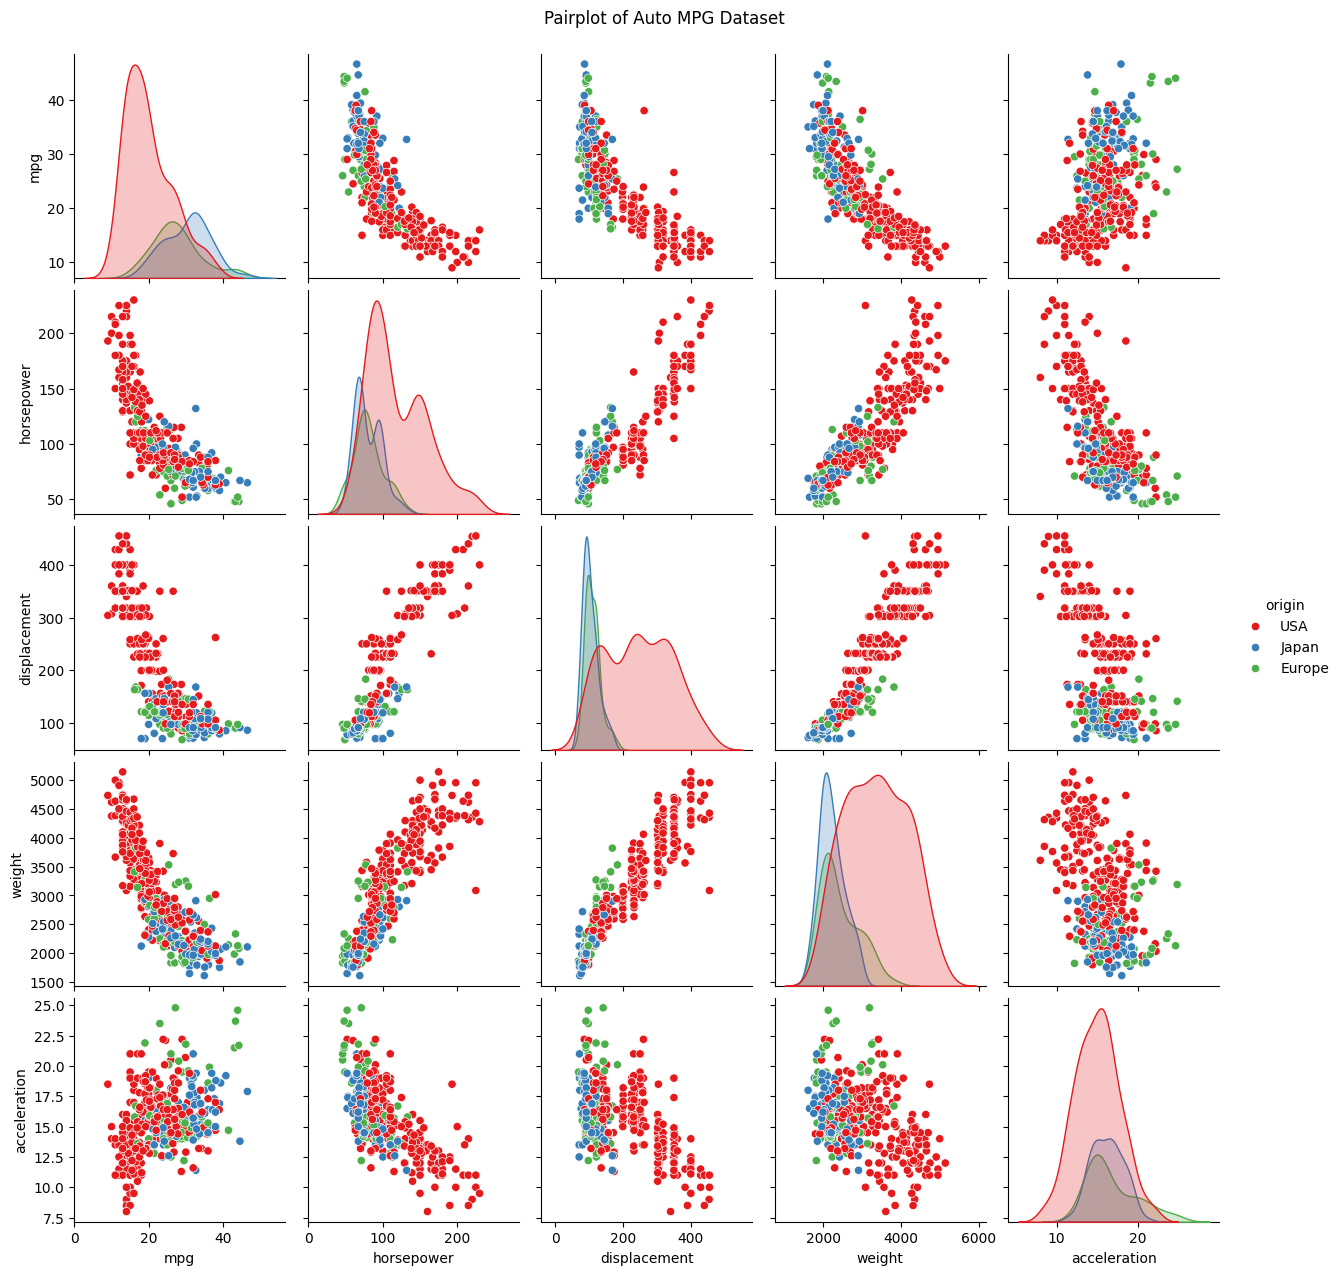

In [ ]:
'''
Comparison of x, y of all columns but not origin as its categorical

Source: https://seaborn.pydata.org/generated/seaborn.pairplot.html
'''
df = pd.read_csv('auto-mpg.csv')  # load the dataset
df['origin'] = df['origin'].astype(str)  # convert 'origin' column to string for categorical coloring

sns.pairplot(
    df,
    vars=['mpg', 'horsepower', 'displacement', 'weight', 'acceleration'],  # select variables for the plot
    hue='origin',  # color points by 'origin'
    diag_kind='auto',
    palette='Set1',
)

plt.suptitle("Pairplot of Auto MPG Dataset", y=1.02)  # add title slightly above the plot
plt.show()  # display the pairplot

The relationship between mpg and horsepower is non-linear, as we can see a strong inverse curve-- as horsepower increases, mpg decreases sharply at first, then levels off.

This suggests that Polynomial Regression would likely perform better than Linear Regression since it can model curved relationships.

Why Not Logistic Regression?
Logistic Regression is for classification problems like binary, and is not suitable for continuous predictions like mpg.

## Exercise 2 - Linear and Polynomial Regression (30 points in total)

### Exercise 2.1 - Splitting Dataset (5 points)
Split the data into training and testing set with the ratio of 80:20.

In [ ]:
'''
Source: https://www.geeksforgeeks.org/how-to-split-a-dataset-into-train-and-test-sets-using-python/
'''

import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('auto-mpg.csv')  # load the dataset
df = df.drop(columns=['origin'])  # drop the 'origin' column

X = df.drop(columns=['mpg'])  # features
y = df['mpg']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)  # split data

print("X_train shape:", X_train.shape)  # check training feature dimensions
print("X_test shape:", X_test.shape)  # check test feature dimensions
print("y_train shape:", y_train.shape)  # check training target dimensions
print("y_test shape:", y_test.shape)  # check test target dimensions

X_train shape: (313, 4)
X_test shape: (79, 4)
y_train shape: (313,)
y_test shape: (79,)


### Exercise 2.2 - Simple Linear Regression (10 points)
Using one of the other attributes(excluding ``origin``) by your choice, please build a simple linear regression model that predicts ``mpg``. <br >

Requirements
 - Report the testing MSE error.

In [ ]:
'''
covered in lecture

OH quesion use polynomial if theres a curve to the data.

using scikit learn

why not logistic? its binary classification. S shaped data

Sources:

https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html
https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.mean_squared_error.html
'''

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# feature selection: using only 'horsepower'
X_train_single = X_train[['horsepower']]
X_test_single = X_test[['horsepower']]

model = LinearRegression()  # create linear regression model
model.fit(X_train_single, y_train)  # train the model
y_pred = model.predict(X_test_single)  # make predictions

mse = mean_squared_error(y_test, y_pred)  # calculate mean squared error

print("The testing mse:", mse)  # output the testing MSE

The testing mse: 17.90711287959503


### Exercise 2.3 - Polynomial Regression (15 points)
Build polynomial regression models that predict ``mpg`` with the same choice in 2.2. <br >
Specifically, from degree=2 to degree=4, build one respectively. <br >
Then, based on the reported errors from only these three degrees, **do you think there is a sign of overfitting? Provide your reasoning.**


Requirements
 - Report the training MSE error for each of the three degrees.
 - Report the testing MSE error for each of the three degrees.


In [ ]:
'''
Sources: https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
'''

from sklearn.preprocessing import PolynomialFeatures

training_errors = []
testing_errors = []

for degree in range(2, 5):  # iterate through polynomial degrees 2 to 4
    poly = PolynomialFeatures(degree=degree)  # create polynomial features
    X_train_poly = poly.fit_transform(X_train_single)  # transform training data
    X_test_poly = poly.transform(X_test_single)  # transform testing data

    model = LinearRegression()  # create linear regression model
    model.fit(X_train_poly, y_train)  # train the model

    y_train_pred = model.predict(X_train_poly)  # predict on training data
    y_test_pred = model.predict(X_test_poly)  # predict on testing data

    train_mse = mean_squared_error(y_train, y_train_pred)  # calculate training MSE
    test_mse = mean_squared_error(y_test, y_test_pred)  # calculate testing MSE

    training_errors.append(train_mse)  # store training MSE
    testing_errors.append(test_mse)  # store testing MSE

    print(f"degree {degree}: Training MSE: {train_mse:.4f}")  # print training MSE for the degree
    print(f"degree {degree}: Testing MSE: {test_mse:.4f}")  # print testing MSE for the degree
    print()

print("training MSE:", training_errors)  # print all training MSEs
print("testing MSE:", testing_errors)  # print all testing MSEs

degree 2: Training MSE: 20.1274
degree 2: Testing MSE: 14.5517

degree 3: Training MSE: 20.0049
degree 3: Testing MSE: 14.9663

degree 4: Training MSE: 19.9276
degree 4: Testing MSE: 14.9309

training MSE: [20.127443064898532, 20.00492343749881, 19.92762081323925]
testing MSE: [14.551737150450501, 14.966273287698002, 14.930912989335216]


The testing MSE increases slightly from degree 2 to degree 3 and degree 4, while training MSE improves marginally. Although the gap between training and testing MSE is not extreme, the increase in testing MSE suggests overfitting is starting to occur

## Exercise 3 - Overfitting and Underfitting (25 points in total)
**The fitting dataset** contains the actual train and test data spread for a model along with three rotations of the same. The dataset is provided in the Canvas file.


### Exercise 3.1 - SSE
Calculate the SSE for the three predictions based on the actual data for train and test provided in the **Fitting CSV**.<br >
Show the calculation for the above metrics.<br >
Highlight the values you get for all three predictions and the actual data.


In [ ]:
df = pd.read_csv('fitting.csv')

sse_results = {'Train': {}, 'Test': {}}

# SSE = Σ(y_actual - y_predicted)^2

# calculate SSE for each prediction
for i in range(1, 4):  # iterate over prediction columns
    sse_train = ((df['Training Data'] - df[f'Prediction {i} Training'])**2).sum()  # training SSE
    sse_results['Train'][f'Prediction {i}'] = sse_train  # store training SSE

    sse_test = ((df['Test Data'] - df[f'Prediction {i} Test'])**2).sum()  # testing SSE
    sse_results['Test'][f'Prediction {i}'] = sse_test  # store testing SSE

# print train SSE results
print("train SSE:")
for key, value in sse_results['Train'].items():
    print(f"  {key}: {value:.4f}")

# print test SSE results
print("test SSE:")
for key, value in sse_results['Test'].items():
    print(f"  {key}: {value:.4f}")

train SSE:
  Prediction 1: 12.2935
  Prediction 2: 12.3363
  Prediction 3: 19.1735
test SSE:
  Prediction 1: 6.3418
  Prediction 2: 2.1254
  Prediction 3: 13.4259


### Excercise 3.2 - Justification
Based on the values calculated above classify the predictions into three categories base prediction, overfitting prediction, underfitting prediction. Also provide appropriate justifications for the classifications.

| Prediction    | Train SSE | Test SSE | Classification        | Justification                                                                 |
|---------------|-----------|----------|-----------------------|-------------------------------------------------------------------------------|
| Prediction 1  | 12.2935   | 6.3418   | Base Prediction       | Balanced performance with good generalization on both training and testing.  |
| Prediction 2  | 12.3363   | 2.1254   | Overfitting Prediction| Very low test SSE compared to train SSE, indicating it over-learns specific patterns. |
| Prediction 3  | 19.1735   | 13.4259  | Underfitting Prediction| High errors on both train and test sets, showing the model is too simplistic. |


## Exercise 4 - Outliers (25 points in total)
Now we are going to perform outlier detection using the diabetes dataset.
The dataset is provided in the Canvas file.

### Exercise 4.1 - box plot
Extract the 'BloodPressure' attribute from the diabetes dataset.<br >
Create a box plot with the 'BloodPressure' attribute.<br >
Highlight the outliers in the box plot with special colors.

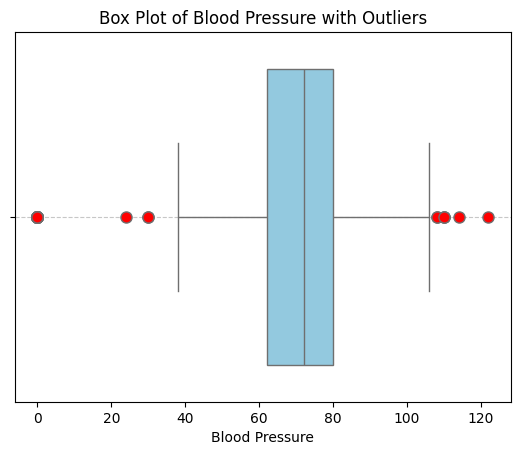

In [ ]:
'''
Sources:
https://seaborn.pydata.org/generated/seaborn.boxplot.html
'''

df = pd.read_csv('diabetes.csv')  # load the dataset

blood_pressure = df['BloodPressure']  # select the 'BloodPressure' column

sns.boxplot(
    x=blood_pressure,
    color="skyblue",  # set box color
    fliersize=8,  # size of outlier markers
    flierprops={'markerfacecolor': 'red', 'marker': 'o'}  # customize outlier appearance
)

plt.title("Box Plot of Blood Pressure with Outliers")  # add plot title
plt.xlabel("Blood Pressure")  # label x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # add horizontal gridlines
plt.show()  # display the plot

### Exercise 4.2 - anomaly detection
Extract features 'BMI' and 'Insulin' from the diabetes dataset.<br >
Implement anomaly detection using the One-Class SVM algorithm.<br >
Plot a scatter plot similar to Lecture 2 Slide 11, annotating the outlier data points.

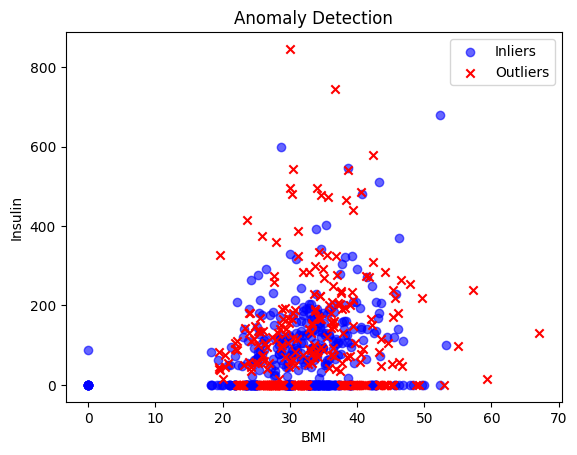

In [ ]:
'''
Sources: https://scikit-learn.org/1.5/modules/generated/sklearn.svm.OneClassSVM.html
'''

import numpy as np
from sklearn.svm import OneClassSVM

X = df[['BMI', 'Insulin']].dropna()  # select 'BMI' and 'Insulin' columns and drop rows with missing values

svm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)  # initialize one-class SVM with RBF kernel
svm.fit(X)  # fit the model to the data

y_pred = svm.predict(X)  # predict anomalies

inliers = X[y_pred == 1]  # filter inliers
outliers = X[y_pred == -1]  # filter outliers

# plot inliers and outliers
plt.scatter(inliers['BMI'], inliers['Insulin'], label='Inliers', color='blue', alpha=0.6)
plt.scatter(outliers['BMI'], outliers['Insulin'], label='Outliers', color='red', marker='x')
plt.title("Anomaly Detection")  # add plot title
plt.xlabel("BMI")  # label x-axis
plt.ylabel("Insulin")  # label y-axis
plt.legend()  # add legend
plt.show()  # display the plot